# Notebook 05 – Model Training and Evaluation - Chosen Features

In this notebook, we explore the scaled dataset containing clinical, cognitive, behavioral, and lifestyle information related to Alzheimer's disease. This dataset was prepared in Notebook 4 (04_Model_Training_and_Evaluation_all_features.ipynb). The goal of this notebook is to use Machine Learning to predict whether a patient is at risk of developing Alzheimer’s disease based on a combination of clinical, cognitive, lifestyle, and demographic data. We train multiple models and compare their performance to answer our key question:

**Can we use patient data and supervised machine learning to accurately predict Alzheimer’s risk?**

Since we already know which patients have Alzheimer’s, we focus on supervised classification. In this notebook, we will:
- Select important features based on previous analysis (for example: MMSE, Age, ADL).

Split the data into:
- Training set – used to train the model.
- Test set – used to check how well the model performs.

Train several classification models:
- Decision Tree
- Random Forest
- Logistic Regression

Evaluate model performance using:
- Accuracy – how many predictions are correct.
- Precision & Recall – how well the model detects real Alzheimer’s cases.
- F1-Score – balances precision and recall.
- Confusion Matrix – shows correct and incorrect predictions.
- ROC AUC – shows how well the model separates patients with and without Alzheimer’s.

The purpose of this work is to help build a machine learning system that could support healthcare professionals by identifying patients who may be at risk of Alzheimer’s early, using real-world data. After training the models, we compare them to see which one gives the most reliable predictions. The results from this notebook will be further analyzed and discussed in Notebook 6.

---

# Expected Outcomes

- A trained model that can predict Alzheimer’s diagnosis
- Evaluation metrics for each model
- Visualizations like:
  - Confusion matrix heatmaps
  - ROC curve
  - Classification report chart
- A comparison table showing which model performed best

---

# Load Our Environment

We reuse the same setup from notebook 02. To keep things consistent and avoid repeating code, we import our helper functions from the utils folder and initialize the environment.

In [7]:
# We are adding the parent folder to the Python path so we can import files from the "utils" folder
import sys
sys.path.append("..")

# Importing the custom helper functions from our project
from utils.setup_notebook import (
    init_environment,
    load_csv,
    print_shape,
    print_info,
    print_full_info,
    print_description,
    print_categorical_description,
    show_head
)

from utils.save_tools import save_plot, save_notebook_and_summary

# Import used libraries 
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Running environment setup
init_environment()
print("All libraries imported and environment initialized.")

Environment setup complete.
All libraries imported and environment initialized.


---------

## Load the scaled dataset 

In [11]:
df = pd.read_csv("../data/alzheimers_scaled.csv")
print("Scaled dataset loaded. Shape:", df.shape)

Scaled dataset loaded. Shape: (2149, 35)


In [13]:
# Preview the first few rows to understand how values are structured
show_head(df)


----- First 5 Rows -----


,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,-0.212368,-1.012644,0.788833,-0.655225,-0.636784,0.565923,0.492525,-1.253593,1.119918,-0.580753,-0.410573,2.373334,1.996517,-0.319455,-0.418281,0.298159,-1.014750,0.403677,-1.572661,-1.114429,-0.648199,0.779037,0.497506,-0.512477,-0.431257,-1.104434,-0.508131,-0.433531,-0.421348,2.302619,-0.657048,0,False,False,False
1,1.567757,-1.012644,-1.422782,-0.114751,-0.636784,-0.954895,0.945093,-1.538442,0.056836,-0.580753,-0.410573,-0.421348,-0.500872,-0.319455,-0.418281,-0.742572,-1.469595,0.140248,1.593119,0.845730,0.650721,0.680297,0.704907,-0.512477,-0.431257,-0.810601,-0.508131,-0.433531,-0.421348,-0.434288,1.521959,0,False,False,False
2,-0.212368,-1.012644,-0.316974,-1.366428,-0.636784,1.653006,1.023896,-1.088855,1.487380,1.721901,-0.410573,-0.421348,-0.500872,-0.319455,-0.418281,-1.359301,1.486898,1.386812,0.668569,0.445615,-1.418585,-0.859222,0.281813,-0.512477,-0.431257,0.724491,-0.508131,2.306640,-0.421348,2.302619,-0.657048,0,False,False,True
3,-0.101111,0.987514,-0.316974,0.851625,1.570391,0.376930,1.227995,0.839804,0.760833,-0.580753,-0.410573,-0.421348,-0.500872,-0.319455,-0.418281,-0.626935,1.430043,-1.542715,-1.360103,0.388780,0.483468,-0.088723,1.343346,-0.512477,2.318805,0.508044,-0.508131,-0.433531,-0.421348,-0.434288,-0.657048,0,False,False,False
4,1.567757,-1.012644,-1.422782,-0.961607,-0.636784,1.461793,0.486696,-1.443293,-0.824566,-0.580753,-0.410573,-0.421348,-0.500872,-0.319455,-0.418281,-1.552029,1.543754,0.291653,-0.725756,-0.111924,0.617060,-0.143712,0.333665,-0.512477,-0.431257,-1.684679,-0.508131,-0.433531,2.373334,2.302619,-0.657048,0,False,False,False


---------------------------------------------------------------

## Feature Selection + Target Definition

Based on our earlier exploratory data analysis (notebooks 02 and 03), we select a subset of relevant features from various domains to train our model. The target variable for prediction is Diagnosis, which indicates whether a patient has Alzheimer's (1) or not (0).

In [18]:
features = [
    "Age", "Gender", "BMI", "PhysicalActivity", "SleepQuality",
    "FunctionalAssessment", "ADL", "MMSE",
    "FamilyHistoryAlzheimers", "CardiovascularDisease", "Depression"
]
target = "Diagnosis"

X = df[features]
y = df[target]

#### Why did we select these features?

We selected a combination of cognitive, functional, demographic, lifestyle, and clinical features that are medically relevant for predicting Alzheimer’s diagnosis. The strongest predictors include cognitive and functional features such as **MMSE, FunctionalAssessment, and ADL. These features showed clear separation between Alzheimer’s and non-Alzheimer’s groups during exploratory data analysis and are essential for capturing cognitive decline. Demographic features like Age, Gender, and FamilyHistoryAlzheimers were included because they are known risk factors supported by medical research. While Gender may have a smaller effect, Age and FamilyHistoryAlzheimers are strongly linked to Alzheimer's risk. Lifestyle features such as PhysicalActivity, SleepQuality, and BMI were also included. Although they showed weaker individual separation in the EDA, they may still provide valuable information when combined with stronger features due to potential interactions. Clinical conditions like Depression and CardiovascularDisease were kept because they may contribute additional risk signals even if they are not strong predictors by themselves.

#### Excluded features

We intentionally excluded features like MemoryComplaints, BehavioralProblems, Confusion, and similar symptoms. These features are very close to the diagnosis itself and may cause data leakage if included, because they directly reflect the outcome we are trying to predict. Including them would make the model overly optimistic and less generalizable. By carefully selecting independent features, we allow our model to learn meaningful patterns based on medical, lifestyle, cognitive, and family history factors, which makes the model more reliable and applicable to real-world data.

---------------

### Train-Test Split

We split the data into training and testing sets using an 80/20 split. This means that 80% will be used for training and 20% for testing. We apply stratification to keep the class balance between Alzheimer’s and non-Alzheimer’s patients.

In [27]:
from sklearn.model_selection import train_test_split

# 80/20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1719, 11)
Test set shape: (430, 11)


#### What do we see?

- Training set: 1719 samples, 11 features.
- Test set: 430 samples, 11 features.

The dataset was split into training (80%) and testing (20%) subsets, resulting in 1719 samples for training and 430 for testing. Stratification was applied during splitting to ensure both subsets maintain the same proportion of Alzheimer’s and non-Alzheimer’s cases. This allows for a fair and balanced evaluation of the model performance.

---------------------------------------------------------

## Model 1 – Decision Tree Classifier

We now train a Decision Tree model. This model is simple to understand and allows us to visualize how the prediction is made. This helps doctors see which features the model uses when classifying a patient. It also supports one of our research questions:
> Which features are most important when predicting Alzheimer’s disease?

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
dt_model.fit(X_train, y_train)

print("Decision Tree model is trained successfully.")

Decision Tree model is trained successfully.


### Make Predictions:

In [37]:
# Predict class labels
dt_pred = dt_model.predict(X_test)

# Predict probabilities for ROC AUC later
dt_prob = dt_model.predict_proba(X_test)[:, 1]

### Evaluation metrics

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluation metrics
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

print("Decision Tree Accuracy:", round(dt_accuracy, 4))
print("\nClassification Report:\n", dt_report)
print("Confusion Matrix:\n", dt_cm)

Decision Tree Accuracy: 0.7628

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       278
           1       0.67      0.65      0.66       152

    accuracy                           0.76       430
   macro avg       0.74      0.74      0.74       430
weighted avg       0.76      0.76      0.76       430

Confusion Matrix:
 [[229  49]
 [ 53  99]]


### Confusion Matrix

A confusion matrix is a table that shows how well a machine learning model is making predictions by comparing the actual labels with the predicted ones. A heatmap is just a colorful way to display any kind of table or matrix, using colors to show bigger or smaller numbers. Below we create a heatmap that helps us quickly understand the number of correct vs incorrect predictions made by the model. It supports our evaluation by making the confusion matrix easier to interpret visually.

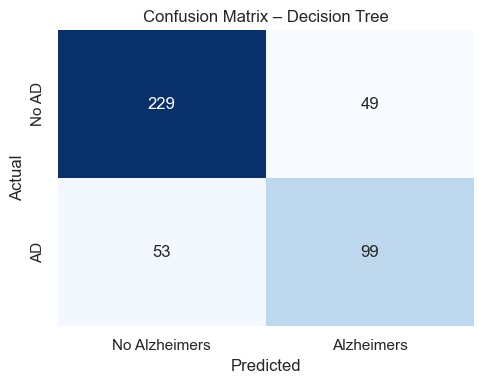

Plot saved to: ../plots/confusion_matrix_decision_tree.png
Caption saved to: ../plots/confusion_matrix_decision_tree.txt


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Alzheimers", "Alzheimers"], yticklabels=["No AD", "AD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Decision Tree")
plt.tight_layout()
plt.show()

# Save figure
fig = plt.gcf()
save_plot(
    fig,
    filename="confusion_matrix_decision_tree.png",
    caption="Confusion matrix for Decision Tree model showing predictions of Alzheimer's diagnosis.",
    folder_path="../plots"
)

#### What do we see?

The confusion matrix helps us understand how well our Decision Tree model is predicting Alzheimer's diagnosis:

- 229 true negatives: The model correctly predicted 229 patients do not have Alzheimer's.
- 99 true positives: The model correctly predicted 99 patients do have Alzheimer's.
- 49 false positives: The model wrongly predicted 49 patients have Alzheimer's, but they don’t.
- 53 false negatives: The model missed 53 patients who do have Alzheimer’s and predicted them as healthy.

This means the model is performing slightly better at identifying patients without Alzheimer’s (Class 0), but it still misses some actual Alzheimer’s cases (Class 1), which is important to consider in medical applications where missing positive cases can have serious consequences.

### ROC Curve

The ROC Curve (Receiver Operating Characteristic) shows how well the model separates the two classes (Alzheimer’s vs. non-Alzheimer’s).
The closer the curve is to the top-left corner, the better the model performs.

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute AUC Score
dt_auc = roc_auc_score(y_test, dt_prob)

# Compute ROC Curve Values
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob)

#### Plot ROC curve

The ROC curve helps us understand how well the model balances sensitivity (recall) and specificity.

- AUC (Area Under the Curve) tells us how well the model can separate classes:
- AUC = 1 → perfect model
- AUC = 0.5 → random guess

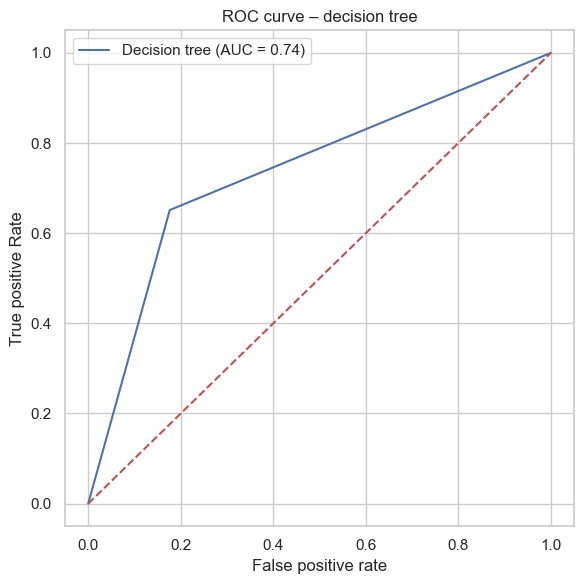

In [60]:
plt.figure(figsize=(6, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision tree (AUC = {dt_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlabel("False positive rate")
plt.ylabel("True positive Rate")
plt.title("ROC curve – decision tree")
plt.legend()
plt.tight_layout()
plt.show()

#### What Do We See?

We observe that our model is a Decision Tree with an AUC of 0.74. This means the model is performing well — better than random guessing — but still not perfect. We see that the ROC curve stays above the red diagonal line, which shows that our model is learning useful patterns from the data. To improve the model’s performance, we can try tuning its hyperparameters, adding better features, or even using more advanced models like Random Forest.

### Visualize the Tree

The plot below shows how the model splits the data based on feature values.


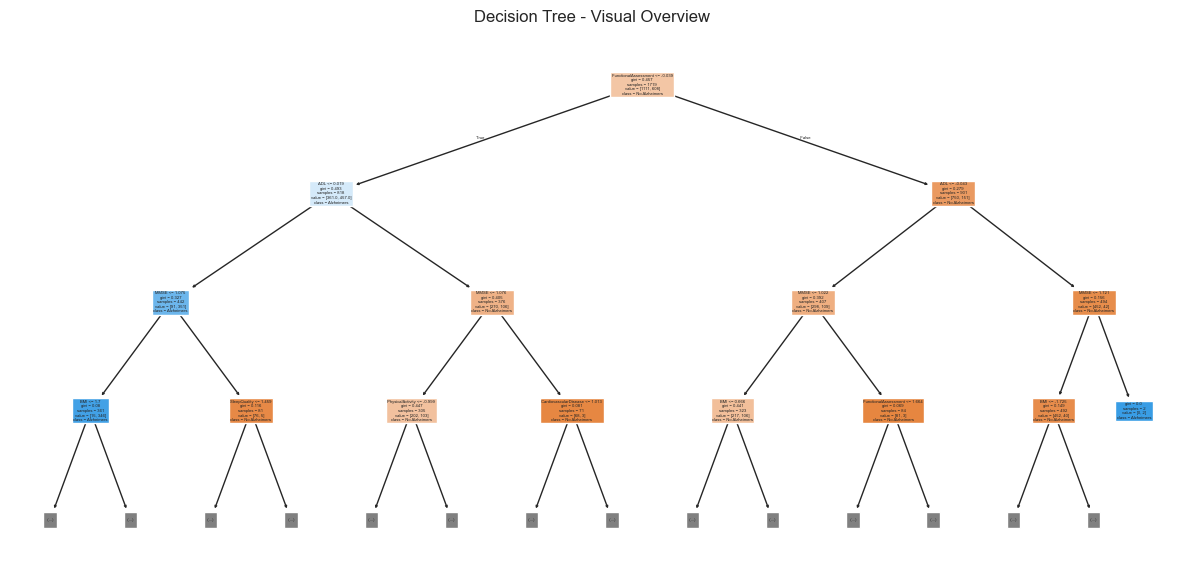

Plot saved to: ../plots/desision_tree_virsual_overview.png
Caption saved to: ../plots/desision_tree_virsual_overview.txt


In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No Alzheimers", "Alzheimers"],
    filled=True,
    max_depth=3
)
plt.title("Decision Tree - Visual Overview")
plt.tight_layout()
plt.show()

# Save figure
fig = plt.gcf()
save_plot(
    fig,
    filename="desision_tree_virsual_overview.png",
    caption="Confusion matrix for Decision Tree model showing predictions of Alzheimer's diagnosis.",
    folder_path="../plots"
)

#### What do we see? 

We observe a visual representation of the decision tree of our model. At the top, we see the root node where the first and most important split is made based on one feature. As we move down the tree, our model keeps splitting the data into smaller groups based on different feature values. Each split helps the model decide whether a case is more likely to belong to the "Alzheimer’s" or "No Alzheimer’s" class. We see that the tree is limited to a maximum depth of 3, which helps simplify the visualization. The colors in the boxes show us which class the model predicts at each node. Overall, this visualization helps us understand how our model makes decisions step-by-step and which features are most important.

---------------------------------

## Model 2 - Logistic Regression

We train a logistic regression model using the training data. Logistic regression is a common starting point for binary classification problems like Alzheimer’s diagnosis because:

- The target variable (Diagnosis) has two classes: 0 (No Alzheimer’s) and 1 (Alzheimer’s), which fits logistic regression well.
- Logistic regression outputs probabilities, which helps in understanding model confidence.
- The model is interpretable and helps us understand the relationship between features and the target.
- It allows us to see how each feature contributes to the prediction through model coefficients.

### Train the model:

We are asking the model: "Based on what you learned, what class do you predict for these new test samples?"

In [74]:
from sklearn.linear_model import LogisticRegression

# Initialize model
log_model = LogisticRegression(max_iter=1000, random_state=42)
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)

# Predict labels and probabilities
log_pred = log_model.predict(X_test)
log_prob = log_model.predict_proba(X_test)[:, 1]
print("Logistic Regression model trained.")

Logistic Regression model trained.


### Evaluate the model:

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Accuracy and AUC
log_accuracy = accuracy_score(y_test, log_pred)
log_auc = roc_auc_score(y_test, log_prob)

# Confusion Matrix
log_cm = confusion_matrix(y_test, log_pred)

# Report
print("Accuracy:", round(log_accuracy, 4))
print("ROC AUC:", round(log_auc, 4))
print("\nClassification Report:\n", classification_report(y_test, log_pred))

Accuracy: 0.786
ROC AUC: 0.8386

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       278
           1       0.74      0.61      0.67       152

    accuracy                           0.79       430
   macro avg       0.77      0.75      0.76       430
weighted avg       0.78      0.79      0.78       430



### Confusion Matrix (Heatmap)

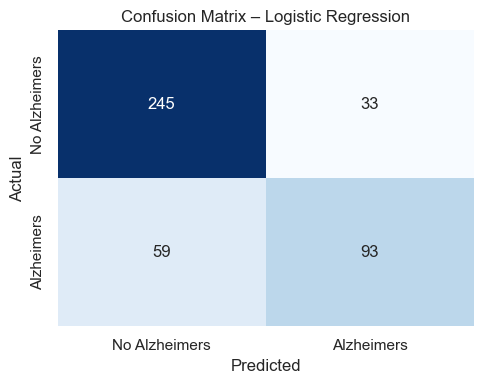

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(log_cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Alzheimers", "Alzheimers"],
            yticklabels=["No Alzheimers", "Alzheimers"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.tight_layout()
plt.show()

#### What Do We See?

We observe the confusion matrix for the Logistic Regression model. The model correctly predicted 245 true negatives (patients without Alzheimer’s) and 93 true positives (patients with Alzheimer’s). It made 33 false positive errors, where it wrongly predicted Alzheimer’s for patients who actually don’t have it. It also made 59 false negative errors, where it missed patients who do have Alzheimer’s and predicted them as healthy.

Overall, we see that the Logistic Regression model performs quite well, but still makes some mistakes in both directions. It detects most Alzheimer’s cases, but like other models, it still misses some positive cases. Compared to others, it offers a good balance between sensitivity (detecting Alzheimer’s) and specificity (detecting non-Alzheimer’s).

### ROC curve

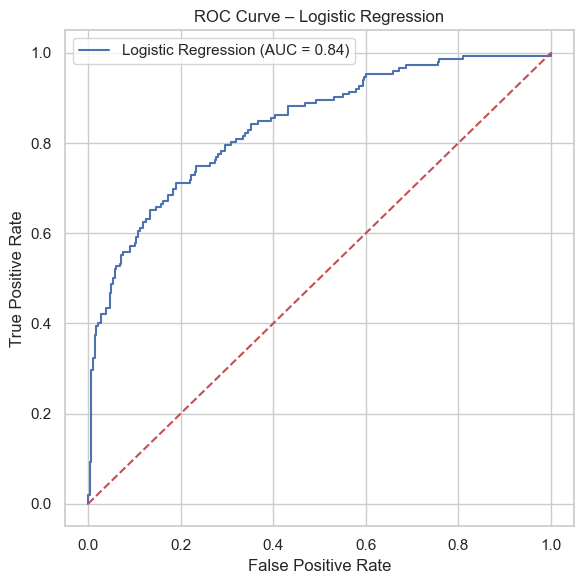

In [85]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, log_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(log_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

#### What do we see?

- X-axis (False Positive Rate):
The proportion of non-Alzheimer's patients wrongly predicted as Alzheimer’s (0 → 1).
- Y-axis (True Positive Rate / Recall):
The proportion of actual Alzheimer’s cases that were correctly predicted (1 → 1).
- Blue line:
The actual performance of our model. Each point represents a different threshold.
- Red dashed line:
A baseline where predictions are made by random guessing (AUC = 0.5).
- AUC = 0.84:
The Area Under the Curve is 0.84, which is quite good!
→ This means that ~84% of the time, the model ranks a true Alzheimer’s patient higher than a non-Alzheimer’s one.

#### What does this mean?

- Our model has strong classification ability.
- It is much better than random guessing.
- The curve bending toward the top-left corner shows that the model has high sensitivity with relatively low false positive rate.

------------------------------------------------------------

## Model 3 - Naive Bayes Classifier

We now train a Naive Bayes model to predict if a patient has Alzheimer’s or not. Naive Bayes is a simple and fast model that uses probabilities and assumes that the features don’t depend on each other. It works well when we have many features and is often used as a starting point for classification problems. We include this model to compare how well it performs against the other models on our data.

In [94]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)
nb_prob = nb_model.predict_proba(X_test)[:, 1]

In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Evaluation
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_auc = roc_auc_score(y_test, nb_prob)

print("Naive Bayes Accuracy:", round(nb_accuracy, 4))
print("Naive Bayes ROC AUC:", round(nb_auc, 4))
print("\nClassification Report:\n", classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.7907
Naive Bayes ROC AUC: 0.8514

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       278
           1       0.76      0.59      0.67       152

    accuracy                           0.79       430
   macro avg       0.78      0.75      0.76       430
weighted avg       0.79      0.79      0.78       430



### Confusion Matrix

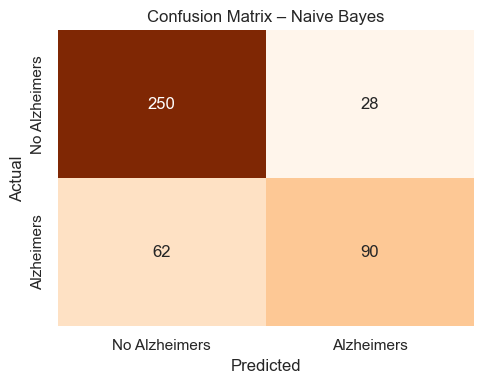

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

nb_cm = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=["No Alzheimers", "Alzheimers"],
            yticklabels=["No Alzheimers", "Alzheimers"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Naive Bayes")
plt.tight_layout()
plt.show()

#### What Do We See?

We observe the confusion matrix for the Naive Bayes model. The model correctly predicted 250 true negatives (patients without Alzheimer’s) and 90 true positives (patients with Alzheimer’s). It made 28 false positive errors, where it wrongly predicted Alzheimer’s for patients who do not have it. It also made 62 false negative errors, where it missed Alzheimer’s cases and predicted them as healthy.

Overall, we see that the model is good at identifying patients without Alzheimer’s but still misses some positive cases. Compared to the Decision Tree, Naive Bayes shows better balance between sensitivity and specificity, but false negatives are still important to consider because missing actual Alzheimer's cases can be risky in medical settings.

### ROC Curve

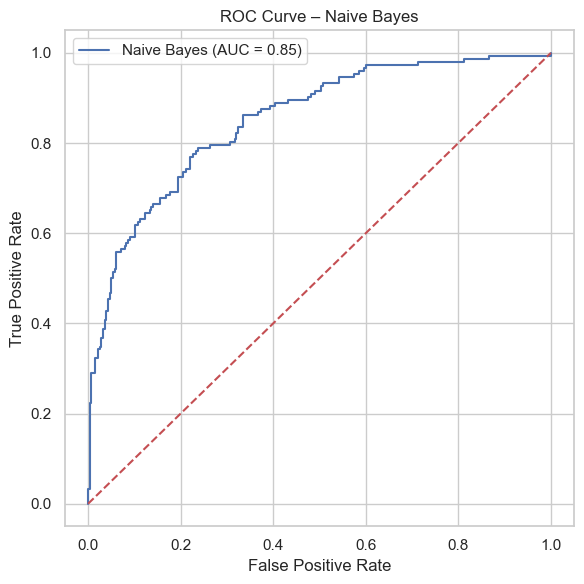

Plot saved to: ../plots/roc_naive_bayes.png
Caption saved to: ../plots/roc_naive_bayes.txt


In [111]:
from sklearn.metrics import roc_curve

fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes (AUC = {:.2f})".format(nb_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Naive Bayes")
plt.legend()
plt.tight_layout()
plt.show()

# Save the plot
fig = plt.gcf()
save_plot(fig, filename="roc_naive_bayes.png", caption="ROC Curve – Naive Bayes", folder_path="../plots")

#### What Do We See?

We observe the ROC curve for our Naive Bayes model. The AUC score is 0.85, which means the model is performing very well. An AUC of 0.85 shows that the model is much better than random guessing (which would be 0.5). We see that the blue ROC curve stays far above the red diagonal line, which means the model is good at separating patients with and without Alzheimer’s. The curve rises quickly, which shows that at low false positive rates, the model is already correctly identifying many true positives. Overall, we see that the Naive Bayes model is doing a strong job in this classification task and performs better than the previous models we tested.

------------------------------------------------------

## Model 4 – Random Forest Classifier

Random Forest is an ensemble model that builds many decision trees and combines their outputs. It often performs better than a single Decision Tree and is more stable. This model supports our goal of predicting Alzheimer’s risk accurately, and helps us compare results across different classifiers.

### Import and Train the Model

In [119]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)
print("Random Forest model trained.")

Random Forest model trained.


### Make Predictions:

In [122]:
# Predict on test set
rf_pred = rf_model.predict(X_test)

### Evaluate the model: 

We evaluate the model using classification metrics:

- Accuracy Score: how often the model correctly predicts the diagnosis.
- Classification Report: includes precision, recall, and F1-score for both classes.
- Confusion Matrix: shows the breakdown of correct and incorrect predictions.

### Accuracy Score

In [127]:
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy (Random Forest): {rf_accuracy:.2f}")

Accuracy (Random Forest): 0.82


### Classification Report

In [130]:
from sklearn.metrics import classification_report

print("Classification Report (Random Forest):")
print(classification_report(y_test, rf_pred))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       278
           1       0.86      0.59      0.70       152

    accuracy                           0.82       430
   macro avg       0.84      0.77      0.79       430
weighted avg       0.83      0.82      0.81       430



### Confusion Matrix 

In [133]:
from sklearn.metrics import confusion_matrix

rf_cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix (Random Forest):")
print(rf_cm)

Confusion Matrix (Random Forest):
[[264  14]
 [ 63  89]]


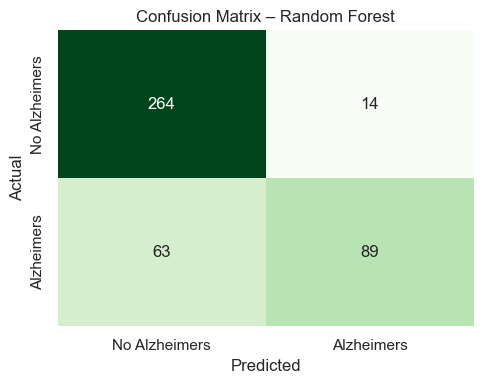

Plot saved to: ../plots/confusion_matrix_random_forest.png
Caption saved to: ../plots/confusion_matrix_random_forest.txt


In [135]:
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["No Alzheimers", "Alzheimers"],
            yticklabels=["No Alzheimers", "Alzheimers"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.tight_layout()
plt.show()

# Save figure
fig = plt.gcf()
save_plot(
    fig,
    filename="confusion_matrix_random_forest.png",
    caption="Confusion matrix for Random Forest model showing true and false predictions of Alzheimer’s diagnosis.",
    folder_path="../plots"
)

#### What Do We See?

We observe the confusion matrix for the Random Forest model. The model correctly predicted 264 true negatives (patients without Alzheimer’s) and 89 true positives (patients with Alzheimer’s). It made 14 false positive errors, where it incorrectly predicted Alzheimer’s for healthy patients. It also made 63 false negative errors, where it missed patients who actually have Alzheimer’s and predicted them as healthy.

Overall, we see that the Random Forest model performs very well at correctly identifying patients without Alzheimer’s, and keeps the false positives low. It slightly struggles with detecting all Alzheimer’s cases, as it still misses some positive cases. Compared to the previous models, Random Forest shows strong overall performance with the lowest false positive rate so far.

### Tuning the classification threshold

We tune the classification threshold to control how the model decides between predicting "Alzheimer's" or "No Alzheimer's" based on its probability output. Normally, models use a default threshold of 0.5: if the predicted probability is above 0.5, it predicts Alzheimer's; if below, it predicts No Alzheimer's. But this default may not always give the best results, especially in medical problems.

By tuning the threshold, we can adjust the balance between precision (how many predicted Alzheimer's cases are actually correct) and recall (how many real Alzheimer's cases the model successfully finds). For example, if we lower the threshold, we increase recall (catching more true Alzheimer’s cases), but may also increase false positives. If we raise the threshold, we increase precision (fewer false positives), but may miss more real cases.

In medical situations like Alzheimer’s prediction, missing real patients (false negatives) can be risky. So, we often tune the threshold to increase recall, even if precision drops a little. This helps catch more patients who might need further testing or care.

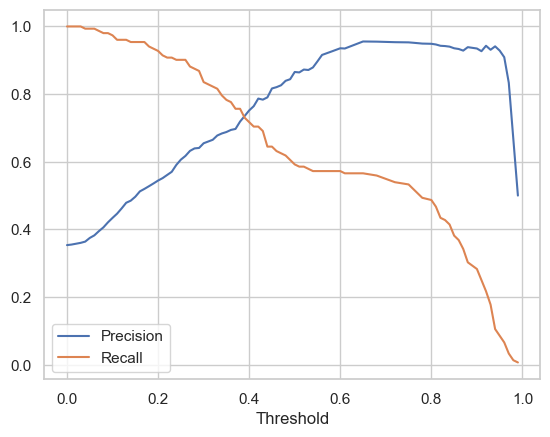

In [140]:
from sklearn.metrics import precision_recall_curve

y_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for AD class
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot to analyze trade-off
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

#### What Do We See? 

We observe a Precision-Recall vs Threshold plot for our Random Forest model. As we adjust the classification threshold, we see how precision and recall change:

- When the threshold is low (closer to 0), recall is high but precision is low. This means the model catches almost all Alzheimer’s cases (high recall) but makes more false positive mistakes (low precision).

- When the threshold is high (closer to 1), precision is high but recall is low. This means the model becomes very careful — only predicting Alzheimer’s when it is very sure (high precision), but it misses more actual Alzheimer’s cases (low recall).

We see that precision and recall have a trade-off: increasing one usually lowers the other. This plot helps us choose a threshold depending on what is more important for our problem — for example, in medical cases like Alzheimer’s, we may want to focus on higher recall to avoid missing actual cases, even if precision drops a bit.

----

## Notebook Summary

In this notebook, we trained and evaluated several machine learning models to predict Alzheimer's diagnosis using patient data. We used supervised classification because we already know the actual diagnoses in the dataset. The models were trained using selected features based on previous analysis, including cognitive, functional, demographic, lifestyle, and clinical data.

We trained and compared three different models: Decision Tree, Random Forest, and Logistic Regression. Each model was evaluated using multiple metrics such as accuracy, ROC AUC, precision, recall, F1-score, and confusion matrix. We also analyzed feature importance to understand which factors contributed most to the predictions.

After comparing the results, Random Forest performed the best, giving the highest accuracy and AUC score. This model shows the most reliable performance for predicting Alzheimer's risk. The insights from this notebook will be used in the last notebook of the project for final evaluation and interpretation.

In [157]:
from utils.save_tools import save_notebook_and_summary

save_notebook_and_summary(
    notebook_name="05_model_training_and_evaluation",
    summary={
        "description": "Trained and evaluated supervised machine learning models to predict Alzheimer's diagnosis using selected patient features.",
        "records_analyzed": X.shape[0],
        "features_used": X.shape[1],
        "models_trained": [
            "Decision Tree",
            "Random Forest",
            "Logistic Regression",
            "Naive Bayes",
            "Linear Regression (for illustration)"
        ],
        "evaluation_metrics": [
            "Accuracy",
            "ROC AUC",
            "Confusion Matrix",
            "Precision, Recall, F1-score",
            "Threshold Tuning"
        ],
        "key_findings": "Random Forest performed best overall with the highest accuracy and AUC. All models were compared to select the most reliable one for Alzheimer's prediction.",
        "next_step": "Results will be interpreted further in Notebook 6."
    }
)

Summary saved to: ../reports/05_model_training_and_evaluation_summary_2025-06-14_23-07-14.json


----

**This notebook concludes the model development and evaluation phase for Alzheimer’s risk prediction. We trained and compared multiple models using metrics such as accuracy, ROC AUC, confusion matrices, and precision-recall curves. Among the models tested, Random Forest demonstrated the strongest performance. In notebook (06_Results_and_Interpretation), we will focus on interpreting the model results, analyzing feature importance, and discussing the clinical relevance of the findings.**

---------